# Flip에 상관 없는 Feature 추출하기

### OpenCV 및 이미지 불러오기

Cloning into 'OpenCV_face_detection_exercise'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 50 (delta 26), reused 36 (delta 15), pack-reused 0
Unpacking objects: 100% (50/50), done.


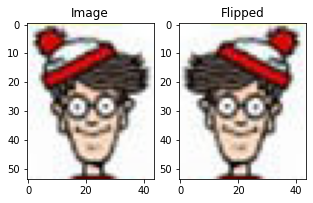

In [1]:
"""
*Uncomment if running on colab* 
Set Runtime -> Change runtime type -> Under Hardware Accelerator select GPU in Google Colab 
"""
!git clone https://github.com/hoihoic/OpenCV_face_detection_exercise.git
!mv OpenCV_face_detection_exercise/* ./

import cv2 # opencv
import numpy as np # treat image as matrix
from matplotlib import pyplot as plt # plot result

image = cv2.imread('wally.png') # load source image
flipped = cv2.flip(image, 1) # flip image

# Get histogram from grayscale
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
flipped_bw = cv2.cvtColor(flipped, cv2.COLOR_BGR2GRAY)

# Convert BGR to RGB
image_plt = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
flipped_plt = cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB)

# show image and template
fig, axs = plt.subplots(1, 2, figsize=(5,5))
axs[0].imshow(image_plt)
axs[0].title.set_text('Image')
axs[1].imshow(flipped_plt)
axs[1].title.set_text('Flipped')

### Pixel domain에서의 크기 비교
Mean Squared Error: mean(|Image - Flipped|^2)

In [2]:
MSE_pixel = np.mean((image_bw - flipped_bw)**2)
print('MSE of pixel difference is %d' % MSE_pixel)

MSE of pixel difference is 73


### Histogram 확인

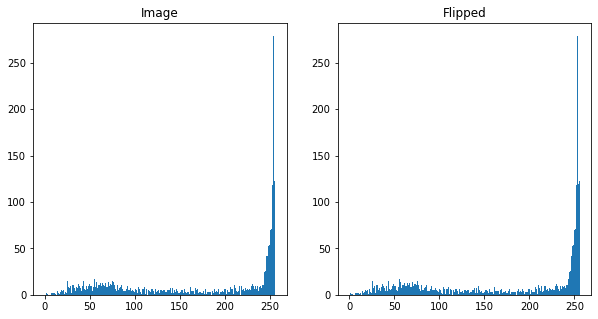

In [3]:
# show image and template
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].hist(image_bw.ravel(), 256, [0, 256]);
axs[0].title.set_text('Image')
axs[1].hist(flipped_bw.ravel(), 256, [0, 256]);
axs[1].title.set_text('Flipped')

### Histogram 크기 비교

In [5]:
histr_image = cv2.calcHist([image_bw], [0], None, [256], [0, 256]) # problem (1)
histr_flipped = cv2.calcHist([flipped_bw], [0], None, [256], [0, 256]) # problem (2)

MSE_hist = np.mean((histr_image - histr_flipped)**2)
print('MSE of hist difference is %d' % MSE_hist)
print('ref: MSE of pixel difference is %d' % MSE_pixel)

MSE of hist difference is 0
ref: MSE of pixel difference is 73
